# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.contrib.layers import flatten
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_trainO, y_trainO = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_trainO.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
#image_shape = [train['coords'][0][2]- train['coords'][0][0],train['coords'][0][3]- train['coords'][0][1]]
#scale_x = X_trainO.shape[1]/train['sizes'][0][0]
#scale_y = X_trainO.shape[2]/train['sizes'][0][1]
#image_shape = [round(image_shape[0]*scale_x),round(image_shape[1]*scale_y)]

image_shape = X_trainO.shape[1:]
# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("label=",y_trainO.shape)
#print("width, height,channel", X_train.shape)
#print("sizes", X_test.shape)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
label= (39209,)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Original Image
Rescaled Image
Rotated Image


(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

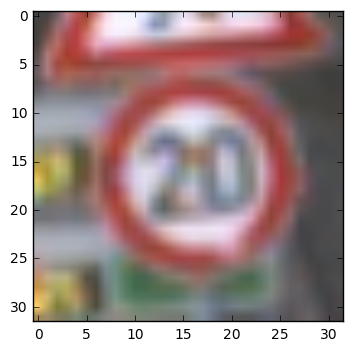

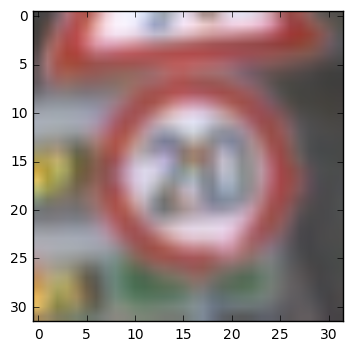

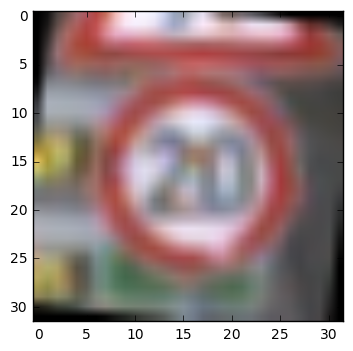

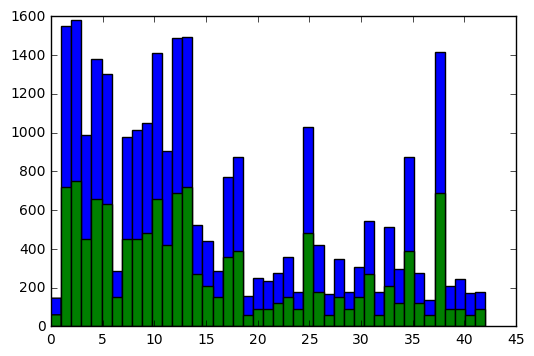

In [58]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#generate sample transformed image for based on original images
res0 = X_trainO[5]
print('Original Image')
plt.imshow(res0)
plt.figure(2)
a = np.random.uniform(0.9, 1.1)
res1 = cv2.resize(X_trainO[5],None,fx=a, fy=a)
res2 = cv2.resize(res1,(32, 32), interpolation = cv2.INTER_AREA)
print ('Rescaled Image')
plt.imshow(res2)
plt.figure(3)
b = np.random.uniform(-15, 15)
M = cv2.getRotationMatrix2D((16,16),b,1)
res3 = cv2.warpAffine(X_trainO[5],M,(32,32))
print ('Rotated Image')
plt.imshow(res3)
plt.figure(4)
plt.hist(y_train, bins=43)
plt.figure
plt.hist(y_test, bins=43)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Step 2.0 Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
#With just original data and dropouts

import tensorflow as tf
import numpy as np
import cv2
from tensorflow.contrib.layers import flatten
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=0.3,random_state=0)
print("data shapes = ", X_train.shape,X_validation.shape)

EPOCHS = 10
BATCH_SIZE = 128

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]
n_classes = 43

def TraSignNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #print("x shape = ", x.get_shape())
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: DropOut.
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # SOLUTION: DropOut.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # SOLUTION: DropOut.
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits


x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = TraSignNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data,keep_p):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: keep_p})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    #preprocess images 
    #X_train1 = np.zeros((n_train,32,32,1))
    #X_test1 = np.zeros((n_test,32,32,1))
    #convert to grayscale
    #for img in range(n_train):
        #X_train1[img,:,:,0] = cv2.cvtColor(X_train[img], cv2.COLOR_BGR2GRAY)
    #for img in range(n_test):
        #X_test1[img,:,:,0] = cv2.cvtColor(X_test[img], cv2.COLOR_BGR2GRAY)
    #X_train= (X_train-127.5)/255
    #X_validation= (X_validation-127.5)/255
    #X_test= (X_test-127.5)/255
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation,1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    # Evaluate on the test datatf.truncated_normal        
    test_acc = evaluate(X_test,y_test,1.0)
    print("Test accuracy = {:.3f}".format(test_acc))    

data shapes =  (27446, 32, 32, 3) (11763, 32, 32, 3)
Training...

EPOCH 1 ...
Validation Accuracy = 0.272

EPOCH 2 ...
Validation Accuracy = 0.404

EPOCH 3 ...
Validation Accuracy = 0.501

EPOCH 4 ...
Validation Accuracy = 0.578

EPOCH 5 ...
Validation Accuracy = 0.636

EPOCH 6 ...
Validation Accuracy = 0.686

EPOCH 7 ...
Validation Accuracy = 0.724

EPOCH 8 ...
Validation Accuracy = 0.764

EPOCH 9 ...
Validation Accuracy = 0.785

EPOCH 10 ...
Validation Accuracy = 0.825

Test accuracy = 0.776


Above is the  network with two convolution layers, pooling layers,  two fully connected layers with drop out layers between them.  I have tried various different  approaches to optimize the  network  including

-  Reducing Learning rate from 0.1 to 0.001
-  Sigma for weight initialization ranging from 1 to  0.01
-  Using Grayscale images instead of RGB
-  different number of Epochs
-  different  batch sizes
-  increasing  the size of network layers  (convent and fully connected layers)
-  dropouts between  all layers



### Step 2.1: Generate Extra Data

It was found that the original samples did not give good accuracy. So extra traning data was generated by

- rescaling all training images by a random number between 0.9 and 1.1
- rotating all training images by a random number between -15 and +15 degree

Yan Lecunn's paper referenced above was the inspiration behind this step to improve network.

In [6]:

#generate extra images for training based on original images
n_sample = X_trainO.shape[0]
for i in range(n_sample):
    a = np.random.uniform(0.9, 1.1)
    b = np.random.uniform(-15, 15) 
    res1 = cv2.resize(X_trainO[i],None,fx=a, fy=a)
    res2 = cv2.resize(res1,(32, 32), interpolation = cv2.INTER_AREA)
    X_trainO = np.append(X_trainO,[res2],axis=0)  #add rescaled images to training data
    M = cv2.getRotationMatrix2D((16,16),b,1)
    res3 = cv2.warpAffine(X_trainO[i],M,(32,32))
    X_trainO = np.append(X_trainO,[res3],axis=0)   #add rotated images to training data
    label1 = y_trainO[i] 
    y_trainO = np.append(y_trainO,[label1],axis=0)
    y_trainO = np.append(y_trainO,[label1],axis=0)
    
print (X_trainO.shape[0])  #total number of training samples
print (y_trainO.shape) 


117627
(117627,)


NameError: name 'numpy' is not defined

In [3]:
np.save('Expanded_Training_Images',X_trainO)
np.save('Expanded_Training_Labels',y_trainO)

### Step 2.2 Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [42]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tf.reset_default_graph()

X_train, X_validation, y_train, y_validation = train_test_split(X_trainO,y_trainO,test_size=0.2,random_state=0)
print("data shapes = ", X_train.shape,X_validation.shape)

EPOCHS = 15
BATCH_SIZE = 128

save_file = 'TrafficSignModel.ckpt'

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]
n_classes = 43

def TraSignNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #print("x shape = ", x.get_shape())
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: DropOut.
    # conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # SOLUTION: DropOut.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # SOLUTION: DropOut.
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits



x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = TraSignNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data,keep_p):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: keep_p})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    #preprocess images 
    #X_train1 = np.zeros((n_train,32,32,1))
    #X_test1 = np.zeros((n_test,32,32,1))
    #convert to grayscale
    #for img in range(n_train):
        #X_train1[img,:,:,0] = cv2.cvtColor(X_train[img], cv2.COLOR_BGR2GRAY)
    #for img in range(n_test):
        #X_test1[img,:,:,0] = cv2.cvtColor(X_test[img], cv2.COLOR_BGR2GRAY)
    #X_train= (X_train-127.5)/255
    #X_validation= (X_validation-127.5)/255
    #X_test= (X_test-127.5)/255
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation,1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    # Evaluate on the test datatf.truncated_normal        
    test_acc = evaluate(X_test,y_test,1.0)
    print("Test accuracy = {:.3f}".format(test_acc))  
    
    # Save the model
    saver.save(sess, save_file)

data shapes =  (94101, 32, 32, 3) (23526, 32, 32, 3)
Training...

EPOCH 1 ...
Validation Accuracy = 0.693

EPOCH 2 ...
Validation Accuracy = 0.863

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.930

EPOCH 5 ...
Validation Accuracy = 0.951

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.965

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.972

EPOCH 12 ...
Validation Accuracy = 0.975

EPOCH 13 ...
Validation Accuracy = 0.975

EPOCH 14 ...
Validation Accuracy = 0.968

EPOCH 15 ...
Validation Accuracy = 0.979

Test accuracy = 0.935


Further training is needed since test accuracy is not high enough

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Remove the previous weights and bias
tf.reset_default_graph()

#EPOCHS = 10
X_train, X_validation, y_train, y_validation = train_test_split(X_trainO,y_trainO,test_size=0.2,random_state=0)

save_file = '/Users/Dushyant/Self-Driving NanoDegree/First Term/CarND-Traffic-Sign-Classifier-Project/TrafficSignModel.ckpt'
save_file2 = 'TrafficSignModel_TrainMoreTrain.ckpt'

BATCH_SIZE = 128
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]
n_classes = 43

def TraSignNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    #print("x shape = ", x.get_shape())
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: DropOut.
    # conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # SOLUTION: DropOut.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # SOLUTION: DropOut.
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits



x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = TraSignNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data,keep_p):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: keep_p})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

saver = tf.train.Saver()
    
with tf.Session() as sess:

    num_examples = n_train
    # Load the weights and bias
    saver.restore(sess, save_file)
    
    print("Training...")
    print()
    validation_accuracy = 0.90
    epoch = 10
    while(validation_accuracy < 0.995):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation,1.0)
        epoch = epoch+1
        print("EPOCH {} ...".format(epoch))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    # Evaluate on the test datatf.truncated_normal        
    test_acc = evaluate(X_test,y_test,1.0)
    print("Test accuracy = {:.3f}".format(test_acc))  
    
    # Save the model
    saver.save(sess, save_file2)
    

Training...

EPOCH 11 ...
Validation Accuracy = 0.989

EPOCH 12 ...
Validation Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.986

EPOCH 15 ...
Validation Accuracy = 0.986

EPOCH 16 ...
Validation Accuracy = 0.983

EPOCH 17 ...
Validation Accuracy = 0.982

EPOCH 18 ...
Validation Accuracy = 0.987

EPOCH 19 ...
Validation Accuracy = 0.985

EPOCH 20 ...
Validation Accuracy = 0.979

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.985

EPOCH 23 ...
Validation Accuracy = 0.984

EPOCH 24 ...
Validation Accuracy = 0.983

EPOCH 25 ...
Validation Accuracy = 0.980

EPOCH 26 ...
Validation Accuracy = 0.981

EPOCH 27 ...
Validation Accuracy = 0.986



KeyboardInterrupt: 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  I used one hot encoding for labels. Then I tried RGB to grayscale converstion but that did not help with improving accuary. Also, I could reason that grayscale images will have not have color information which is quite important for traffic signs e.g. stop signs are always red and white while merge sigs are yellow.
So it converting to grayscale would mean throwing away important features. So Finally, I decided to use original RGB images.
Also, I tried normalization but it didn't improve /affect the outputs. So I did not include that in final  model.
Then I used tranfromation on original images to  generate fake/extra data

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  I split the given training data into 20% validation and 80% training  data using built-in function.
I generated additional  data in order to improve  network accuracy and robustness.
I used rotation and rescaling  transformation for generation of additional data.  These two transformation  seem more realistic and practical. I could have used additional transformation of linear shifting but decided not to use that as a trade-off between cost/time of training the network and marginal improvement in accuracy .

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._



**Answer:**  The architecture is based on  Lenet . It has two convolution network s  whose outputs are pooled with chosing maximum values. Then they are activated with Relu functions before sending them a fully connected layer. Again a Relu function is applied. Then half of the outputs are dropped before sent to the second fully connected layer. Finally, third fully connected network transforms the data into probability for labels. 
I tried using dropouts at various points between layers and found that the dropout between first and second layers is the most effective at preventing overfitting while imporving accuracy of the test data. The accuracy of the network suffers when more dropouts are added. 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:** Adam optimizer,
Batch Size = 128,
Epochs = 27,
Learning Rate = 0.001,
Sigma = 0.1,
mu = 0

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I used trail and error approach.  I started with  a network of  a single linear layer. Then 
-  I used  both grayscale and  RGB  data to train and compare accuracy results.
-  I used normalized and non-normalized data to train and compara accuracy results.
-  I used 0.1 to 0.001 learning  rate to decide the optimal learning  rate
-  I used  batch size of 128, 500 and 1000 and time and accuracy  results. It didn't have noticeable effect.
-  I used  dropouts at four different location  and combinations.  Dropout  reduced validaiton and test accuracy.
-  I used  increased size layers (all convnets and fully connected) but the  accuracy gain for  minimal  and time/cost  penalty  for trainig was higher.
-   Then, I generated extra data.
-  I used a condition on validation accuracy to decide number of epochs. But the validation accruacy stopped improving beyond 98.8 %. So i stopped training at epoch 27.

That gave me good results with validation accuracy  of  > 98% and test accuracy  of about 94%

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

image shape:  (60, 67, 3)
image shape:  (123, 127, 3)
image shape:  (169, 166, 3)
image shape:  (119, 131, 3)
image shape:  (136, 130, 3)
image shape:  (133, 134, 3)
image shape:  (158, 141, 3)
image shape:  (302, 323, 3)
image shape:  (194, 215, 3)
image shape:  (167, 179, 3)


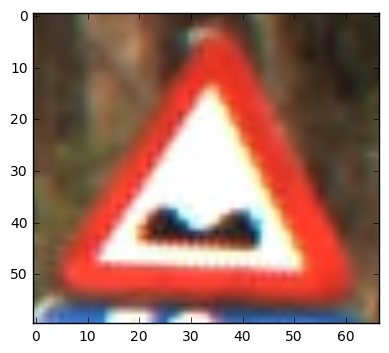

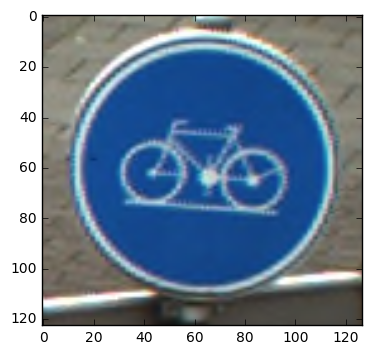

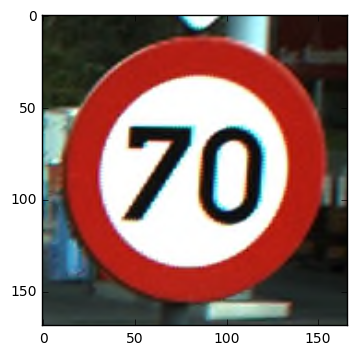

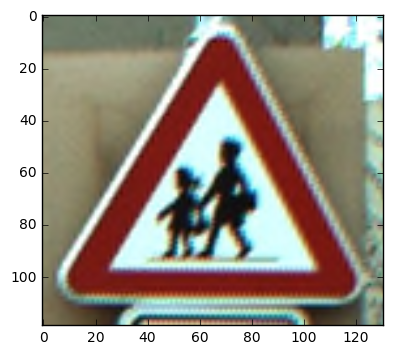

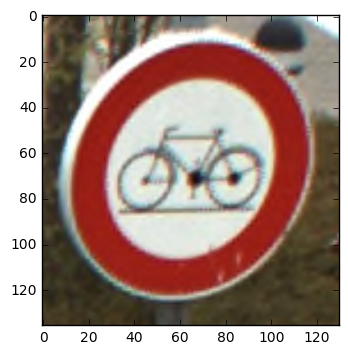

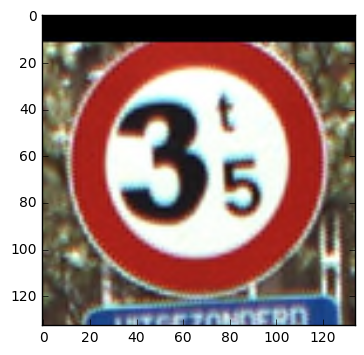

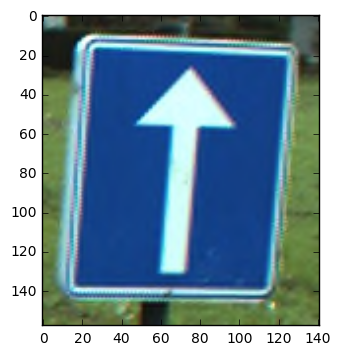

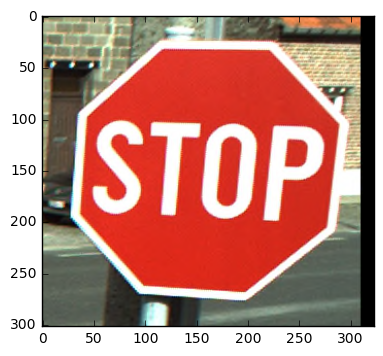

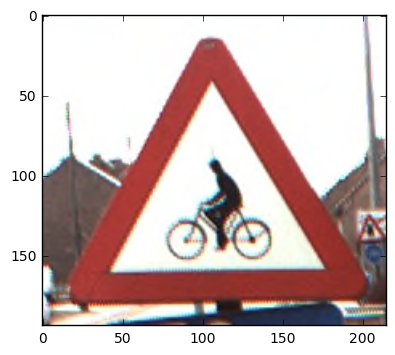

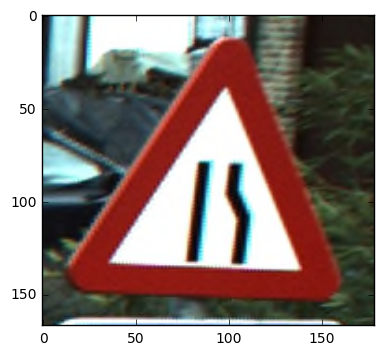

In [11]:
### Load the images and plot them here.
import matplotlib.pyplot as plt
import os

# Visualizations will be shown in the notebook.
%matplotlib inline
i = 0
indir = 'BelgiTestPng/'
for roots,dirs,filenames in os.walk(indir):
    for f in filenames:
        fullpath = os.path.join(indir,f)
        if '.png' in fullpath:
            i+=1
            plt.figure(i)
            x=plt.imread(fullpath)
            plt.imshow(x)
            print('image shape: ',x.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._




**Answer:**  I plotted the images above. These images are traffic signs in Belgium that maybe different than our training set of German Traffic signs. So differences in country's traffic standard may make classification difficult


(10, 32, 32, 3)


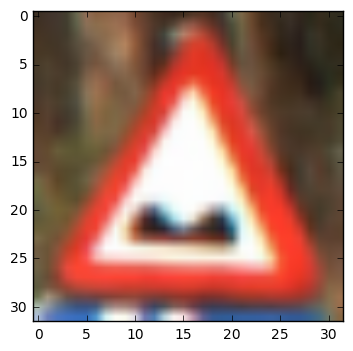

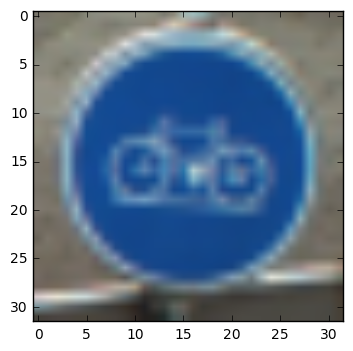

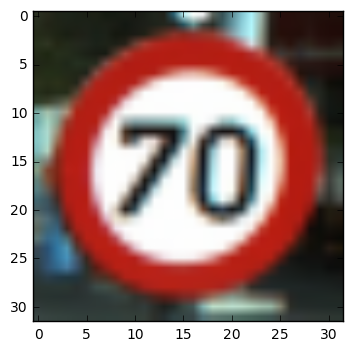

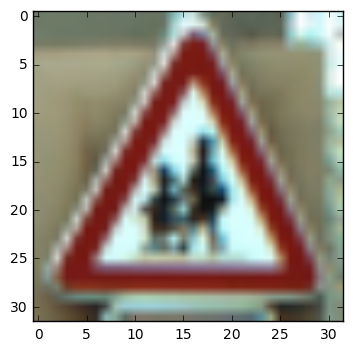

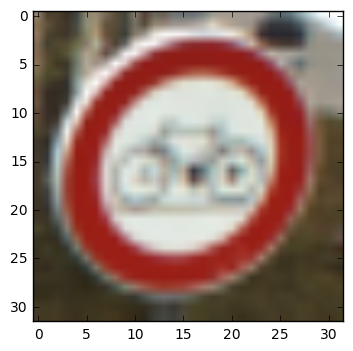

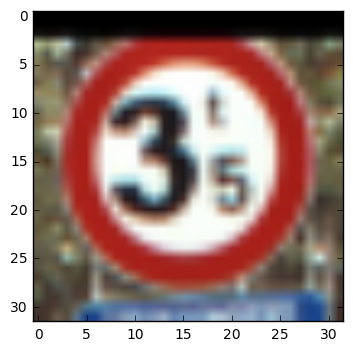

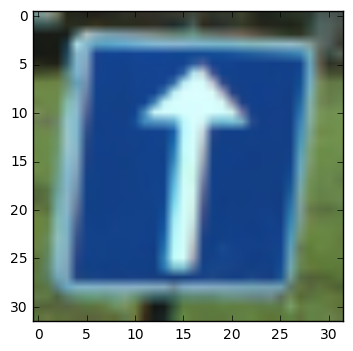

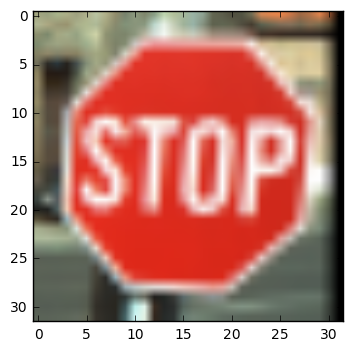

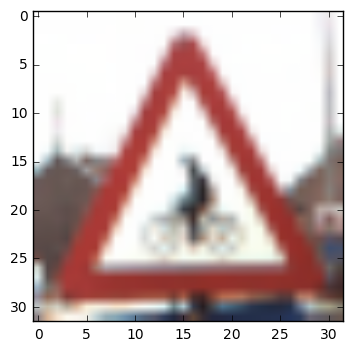

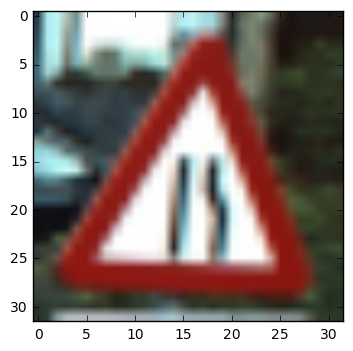

In [12]:
#preprocess test images
import cv2
X_test = np.empty([10,32,32,3])
i = 0
for roots,dirs,filenames in os.walk(indir):
    for f in filenames:
        fullpath = os.path.join(indir,f)
        if '.png' in fullpath:
            x=plt.imread(fullpath)
            X_test[i,:,:,:] = cv2.resize(x,(32, 32),interpolation = cv2.INTER_AREA)
            i+=1
            plt.figure(i)
            plt.imshow(X_test[i-1])
            
print(X_test.shape)
#X_test = tf.to_float(X_test)
#assign labels to test images
y_test = np.array([22,29,4,28,29,16,35,14,29,24])
            

In [13]:
#Run the predictions here

# Remove the previous weights and bias
tf.reset_default_graph()

save_file = '/Users/Dushyant/Self-Driving NanoDegree/First Term/CarND-Traffic-Sign-Classifier-Project/TrafficSignModel_MoreTrain.ckpt'

n_classes = 43

def TraSignNet(x,keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    #print("x shape = ", x.get_shape())
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: DropOut.
    # conv2 = tf.nn.dropout(conv2, keep_prob)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # SOLUTION: DropOut.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # SOLUTION: DropOut.
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits



x = tf.placeholder(tf.float32,(1,32,32,3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = TraSignNet(x,keep_prob)
prob = tf.nn.softmax(logits)
# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

prediction_array = tf.zeros([10,43])
numpy_pred = np.empty([10,43])
                          
                            
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
# Predict for the test data
    print("Testing...")
    print()
    for i in range(10):
        numpy_pred[i,:] = sess.run(prob,feed_dict={x: [X_test[i]],keep_prob: 1})
        
     #= prediction_array.eval()                        
    print("Done")
    print("correct labels")
    print(y_test[:])
    print("prediction classes")
    print(np.argmax(numpy_pred,axis=1))
    print("probablities")
    print(np.amax(numpy_pred,axis=1)) 
    print()
    print("Top 5 Classes")
    print(sess.run(tf.nn.top_k(numpy_pred, k=5)))
    

Testing...

Done
correct labels
[22 29  4 28 29 16 35 14 29 24]
prediction classes
[25 40 40 40  8 40 40  8 25 24]
probablities
[ 0.10394596  0.25576794  0.30735695  0.15139496  0.20511043  0.22635113
  0.14395605  0.12540255  0.12794164  0.11358073]

Top 5 Classes
TopKV2(values=array([[ 0.10394596,  0.09610692,  0.0884124 ,  0.07411792,  0.05242864],
       [ 0.25576794,  0.09482069,  0.06386989,  0.05863141,  0.05683794],
       [ 0.30735695,  0.15228131,  0.06694916,  0.056995  ,  0.04453727],
       [ 0.15139496,  0.09924758,  0.08412306,  0.08155911,  0.04375729],
       [ 0.20511043,  0.1417082 ,  0.06257604,  0.05392787,  0.04301691],
       [ 0.22635113,  0.07108885,  0.06577326,  0.06020228,  0.05483937],
       [ 0.14395605,  0.09851135,  0.09178898,  0.07093661,  0.06698506],
       [ 0.12540255,  0.11789079,  0.11688992,  0.07817589,  0.06939816],
       [ 0.12794164,  0.11059404,  0.10028142,  0.09342837,  0.0788503 ],
       [ 0.11358073,  0.11018372,  0.10944182,  0.0822

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._



**Answer:** The model predicted different labels for most of test images than expected. **It predicted one image correctrly - last image with label #24.** Also, one additional image prediction was in top 3 prediction. So clearly,  my test images are  from very different set than training set. That maybe true because the images are from  Belgian roads while training is done on German signs.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:** The model's probabilities below show that the model is not very confident.
    
    Top 5 Class probabilities
       [[ 0.10394596,  0.09610692,  0.0884124 ,  0.07411792,  0.05242864],
       [ 0.25576794,  0.09482069,  0.06386989,  0.05863141,  0.05683794],
       [ 0.30735695,  0.15228131,  0.06694916,  0.056995  ,  0.04453727],
       [ 0.15139496,  0.09924758,  0.08412306,  0.08155911,  0.04375729],
       [ 0.20511043,  0.1417082 ,  0.06257604,  0.05392787,  0.04301691],
       [ 0.22635113,  0.07108885,  0.06577326,  0.06020228,  0.05483937],
       [ 0.14395605,  0.09851135,  0.09178898,  0.07093661,  0.06698506],
       [ 0.12540255,  0.11789079,  0.11688992,  0.07817589,  0.06939816],
       [ 0.12794164,  0.11059404,  0.10028142,  0.09342837,  0.0788503 ],
       [ 0.11358073,  0.11018372,  0.10944182,  0.08221626,  0.06791765]]
Top 5 Classes
       [[25, 36, 20,  8, 40],
       [40, 33, 25,  8, 20],
       [40,  8, 20, 18,  6],
       [40, 20, 25,  8, 18],
       [ 8, 40, 20,  6, 25],
       [40,  6, 20, 25,  8],
       [40,  8, 35, 20, 25],
       [ 8, 32,  3, 25,  6],
       [25, 20, 11, 40, 24],
       [24, 25, 20, 40, 18]]